# Data Preparation and Exploration

In [1]:
# Import the libraries needed
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [27]:
import os
import sys
import plotly.express as px

In [2]:
# Load the dataset
data = pd.read_csv(r"D:\104 GB\Nexthikes\House_price_prediction\Data\Property_data.csv")

In [3]:
# Display basic information
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   PropertyID            1460 non-null   int64  
 1   PropertyClass         1460 non-null   int64  
 2   PropertyZone          1460 non-null   object 
 3   PropertyFrontage      1201 non-null   float64
 4   PropertySize          1460 non-null   int64  
 5   Street                1460 non-null   object 
 6   Alley                 91 non-null     object 
 7   PropertyShape         1460 non-null   object 
 8   Elevation             1460 non-null   object 
 9   Amenities             1460 non-null   object 
 10  Orientation           1460 non-null   object 
 11  Grade                 1460 non-null   object 
 12  Neighborhood          1460 non-null   object 
 13  Condition1            1460 non-null   object 
 14  Condition2            1460 non-null   object 
 15  BldgType             

In [4]:
# checking for the missing values in the data
print(data.isnull().sum())

PropertyID            0
PropertyClass         0
PropertyZone          0
PropertyFrontage    259
PropertySize          0
                   ... 
SaleMon               0
SaleYr                0
SaleType              0
SaleCondn             0
PropPrice             0
Length: 81, dtype: int64


In [6]:
data.shape

(1460, 81)

In [7]:
# summary statistics
print(data.describe())

        PropertyID  PropertyClass  PropertyFrontage   PropertySize  \
count  1460.000000    1460.000000       1201.000000    1460.000000   
mean    730.500000      56.897260         70.049958   10516.828082   
std     421.610009      42.300571         24.284752    9981.264932   
min       1.000000      20.000000         21.000000    1300.000000   
25%     365.750000      20.000000         59.000000    7553.500000   
50%     730.500000      50.000000         69.000000    9478.500000   
75%    1095.250000      70.000000         80.000000   11601.500000   
max    1460.000000     190.000000        313.000000  215245.000000   

       OverallQual  OverallCond    YearBuilt  YearRemodAdd  \
count  1460.000000  1460.000000  1460.000000   1460.000000   
mean      6.099315     5.575342  1971.267808   1984.865753   
std       1.382997     1.112799    30.202904     20.645407   
min       1.000000     1.000000  1872.000000   1950.000000   
25%       5.000000     5.000000  1954.000000   1967.000000 

## Clean the data for proper analysis 

In [14]:
CSV_PATH = r"D:\104 GB\Nexthikes\House_price_prediction\Data\Property_data.csv"

In [15]:
import numpy as np
import pandas as pd

class HousingHelper:
  
  def __init__(self):
    pass
  
  def read_csv(self, csv_path, missing_values=[]):
    try:
        data = pd.read_csv(csv_path, na_values=missing_values)
        print("file read as csv")
        return data
    except FileNotFoundError:
        print("file not found")
  
  def save_csv(self, data, csv_path):
    try:
        data.to_csv(csv_path, index=False)
        print('File Successfully Saved.!!!')

    except Exception:
        print("Save failed...")

    return data
    
  def percent_missing(self, data: pd.DataFrame) -> float:

    totalCells = np.product(data.shape)
    missingCount = data.isnull().sum()
    totalMissing = missingCount.sum()
    return round((totalMissing / totalCells) * 100, 2)
  
  def percent_missing_for_col(self, data: pd.DataFrame, col_name: str) -> float:
    total_count = len(data[col_name])
    if total_count <= 0:
        return 0.0
    missing_count = data[col_name].isnull().sum()

    return round((missing_count / total_count) * 100, 2)
  
  def convert_bytes_to_megabytes(self, data: pd.DataFrame, bytes_data):

    megabyte = 1*10e+5
    megabyte_col = data[bytes_data] / megabyte

    return megabyte_col

In [16]:
Helper = HousingHelper()

In [17]:
# looking at the data, there are some missing values, that we have to drop such columns becasue they will nmot assist in the analysis at all


In [18]:
# import the data with class
df = Helper.read_csv(CSV_PATH, missing_values = ["n/a", "na", "undefined"])

file read as csv


In [19]:
# Looking to our data
df.head()

,PropertyID,PropertyClass,PropertyZone,PropertyFrontage,PropertySize,Street,Alley,PropertyShape,Elevation,Amenities,...,PoolArea,PoolQC,BoundaryFeatures,AddFeatures,AddVal,SaleMon,SaleYr,SaleType,SaleCondn,PropPrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## Overview Analysis

In [20]:
def convert_labels(df):
    df.columns = [column.replace(' ', '_').lower() for column in df.columns]
    return df

In [21]:
df = convert_labels(df)

In [22]:
class OverViewAnalysis:
    
    def __init__(self, data):
        
        self.data = data
    
    
    def read_head(self, top=10):
        return self.data.head(top)
    
    # returning the number of rows and column information
    def get_info(self):
        row_count, col_count = self.data.shape
    
        print(f"Number of rows: {row_count}")
        print(f"Number of columns: {col_count}")
        print("================================")

        return (row_count, col_count), self.data.info()
    
    # gets number of distnict values in a given column
    def get_count(self, column_name):
        return self.data[column_name].value_counts()
    
    # getting the null count for every column
    def get_null_count(self, column_name):
        print("Null values count")
        print(self.data.isnull().sum())
        return self.data.isnull().sum()
    
    # getting the percentage of missing values
    def get_percent_missing(self):
        #Helper = helper.HousingHelper()
        Helper = HousingHelper()
        
        percent_missing = Helper.percent_missing(self.data)
        
        null_percent_df = pd.DataFrame(columns = ['column', 'null_percent'])
        columns = self.data.columns.values.tolist()
        
        null_percent_df['column'] = columns
        null_percent_df['null_percent'] = null_percent_df['column'].map(lambda x: Helper.percent_missing_for_col(self.data, x))
        
        
        return null_percent_df.sort_values(by=['null_percent'], ascending = False), percent_missing
    
    
    # returning the top property prices
    def PropPrice(self, top=10):
        
        return self.data['PropPrice'].value_counts().head(top)
    
    # returning the top property sizes
    def PropertySize(self, top=5):
        
        return self.data['PropertySize'].value_counts().head(top)
    
   

In [23]:
overViewAnal = OverViewAnalysis(df)

In [24]:
overViewAnal.read_head()

,propertyid,propertyclass,propertyzone,propertyfrontage,propertysize,street,alley,propertyshape,elevation,amenities,...,poolarea,poolqc,boundaryfeatures,addfeatures,addval,salemon,saleyr,saletype,salecondn,propprice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [25]:
overViewAnal.get_info()

Number of rows: 1460
Number of columns: 81
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   propertyid            1460 non-null   int64  
 1   propertyclass         1460 non-null   int64  
 2   propertyzone          1460 non-null   object 
 3   propertyfrontage      1201 non-null   float64
 4   propertysize          1460 non-null   int64  
 5   street                1460 non-null   object 
 6   alley                 91 non-null     object 
 7   propertyshape         1460 non-null   object 
 8   elevation             1460 non-null   object 
 9   amenities             1460 non-null   object 
 10  orientation           1460 non-null   object 
 11  grade                 1460 non-null   object 
 12  neighborhood          1460 non-null   object 
 13  condition1            1460 non-null   object 
 14  condition2            1460 no

((1460, 81), None)

In [28]:
df.isnull().sum()

propertyid            0
propertyclass         0
propertyzone          0
propertyfrontage    259
propertysize          0
                   ... 
salemon               0
saleyr                0
saletype              0
salecondn             0
propprice             0
Length: 81, dtype: int64

### Missing values

In [29]:
null_percent_df, overall_missing = overViewAnal.get_percent_missing()
print(f"The overall missing perceentage is: {overall_missing}%")
print("=============================================")
null_percent_df

The overall missing perceentage is: 6.62%


,column,null_percent
72,poolqc,99.52
74,addfeatures,96.30
6,alley,93.77
73,boundaryfeatures,80.75
25,exteriorcladdingtype,59.73
...,...,...
27,exterqual,0.00
24,roof2material,0.00
23,roof1material,0.00
22,roofmatl,0.00


There are some columns of the data that are like over 60% missing. We drop them so taht we can have unbiased prediction at the end

In [30]:
import pandas as pd

class CleanHousingData:
    def __init__(self, data: pd.DataFrame):
        self.df = data
        
        print('Automation in Action...!!!')

    def drop_duplicate(self, data: pd.DataFrame) -> pd.DataFrame:
        """
        drop duplicate rows
        """
        data.drop_duplicates(inplace=True)

        return data

    def convert_to_datetime(self, data: pd.DataFrame) -> pd.DataFrame:
        """
        convert column to datetime
        """

        data['salemon'] = pd.to_datetime(
            data['salemon'])
        data['saleyr'] = pd.to_datetime(
            data['saleyr'])

        return data

    def drop_columns_with_null_values(self, data: pd.DataFrame, threshold_in_percent=30) -> pd.DataFrame:
        Helper = HousingHelper()

        null_percent_df = pd.DataFrame(columns=['column', 'null_percent'])
        columns = data.columns.values.tolist()

        null_percent_df['column'] = columns
        null_percent_df['null_percent'] = null_percent_df['column'].map(
            lambda x: Helper.percent_missing_for_col(data, x))

        columns_to_be_dropped = null_percent_df[null_percent_df['null_percent']
                                                > threshold_in_percent]['column'].to_list()
        data = self.__drop_columns(data, columns_to_be_dropped)

        return data

    def drop_rows_with_null_values(self, data: pd.DataFrame, threshold_in_percent=1) -> pd.DataFrame:
        Helper = HousingHelper()

        null_percent_df = pd.DataFrame(columns=['column', 'null_percent'])
        columns = data.columns.values.tolist()

        null_percent_df['column'] = columns
        null_percent_df['null_percent'] = null_percent_df['column'].map(
            lambda x: Helper.percent_missing_for_col(data, x))
        
        columns_subset = null_percent_df[null_percent_df['null_percent']
                                         < threshold_in_percent]['column'].to_list()

        data = data.dropna(subset=columns_subset)

        return data

    def handle_missing_qantitative_data_with_mean(self, data: pd.DataFrame, method="mean"):

        numeric_data = ['int16', 'int32', 'int64',
                        'float16', 'float32', 'float64']

        all_cols = data.columns.to_list()
        num_cols = [c for c in all_cols if data[c].dtypes in numeric_data]

        if (method == "mean"):

            for col in num_cols:
                data[col] = data[col].fillna(data[col].mean())

            return data

        elif method == "ffill":

            for col in num_cols:
                data[col] = data[col].fillna(method='ffill')

            return data

        elif method == "bfill":

            for col in num_cols:
                data[col] = data[col].fillna(method='bfill')

            return data
        else:
            print("Method unknown")
            return data
    
    def handle_missing_categorical_data_with_mean(self, data: pd.DataFrame, method="ffill"):

        numeric_data = ['int16', 'int32', 'int64',
                        'float16', 'float32', 'float64']

        all_cols = data.columns.to_list()
        num_cols = [c for c in all_cols if not data[c].dtypes in numeric_data]
        
        if method == "ffill":

            for col in num_cols:
                data[col] = data[col].fillna(method='ffill')

            return data

        elif method == "bfill":

            for col in num_cols:
                data[col] = data[col].fillna(method='bfill')

            return data
        else:
            print("Method unknown")
            return data
    def __drop_columns(self, data, columns=[]):

        return data.drop(columns, axis=1)

The data that is presented can be used both as a time series, because of the aspect of time that is present in the data. 
Otherwise we can make the prediction by excluding the aspect of time, as it will not help in the prediction of the price 
of the house, if wwe are not looking for the time series of the same. 
But because of time factor and that the economy keeps changing, we can say that the time frames, like the sales of 
houses in 2007, will be different price form teh year 2010. 

In [31]:
cleanHousingData = CleanHousingData(df)

Automation in Action...!!!


In [33]:
cleaned_df = cleanHousingData.drop_columns_with_null_values(df, 30)

cleaned_df = cleanHousingData.convert_to_datetime(cleaned_df)

cleaned_df = cleanHousingData.drop_duplicate(cleaned_df)

cleaned_df = cleanHousingData.drop_rows_with_null_values(cleaned_df, 1)

cleaned_df = cleanHousingData.handle_missing_qantitative_data_with_mean(cleaned_df)

cleaned_df = cleanHousingData.handle_missing_categorical_data_with_mean(cleaned_df, "ffill")



overViewAnal_2 = OverViewAnalysis(cleaned_df)

In [34]:
null_percent_df, overall_missing = overViewAnal_2.get_percent_missing()
print(f"The overall missing percentage is: {overall_missing}%")
print("=============================================")

The overall missing percentage is: 0.0%


Noww the data is clean.

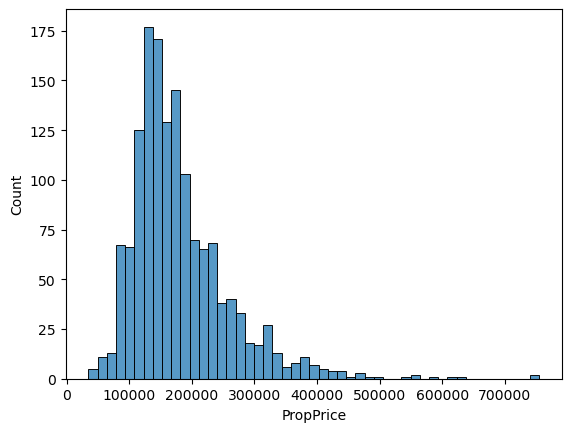

In [10]:
# visualize the distribution of teh target varibale (House prices)
sns.histplot(data['PropPrice'])
plt.show()

This shows that most of the price lies between around 100,000 and 300,000. 

In [35]:
# Save the clean data
SAVE_PATH = '../Data/cleaned_data.csv'

In [36]:
cleaned_df = Helper.save_csv(cleaned_df, SAVE_PATH)

File Successfully Saved.!!!


# Feature Extraction and Analysis